# Soccer Data Investigate & Visulization

Prepared By : [Ibrahim Mohamed Belal](https://www.linkedin.com/in/ibrahim-belal-aaab59a7?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3B532MFYzCRmyv%2F8m2bozuaw%3D%3D) <pre>
<img style="-webkit-user-select: none;margin: auto;cursor: zoom-in;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://media-exp1.licdn.com/dms/image/C4D03AQGkobDTHxhKqw/profile-displayphoto-shrink_800_800/0/1629059236543?e=1635379200&amp;v=beta&amp;t=h-KiDlCoaVAjh8QELmI15QF16qmRYhQA8ug_QUnOpr0" width="75" height="75">
</pre>

### Table of Contents
* [1. Introduction](#1.-Introduction).
* [2. Data Wrangling and Assessing](#2.-Data-Wrangling-and-Assessing).
    * [2.1. Finding](#2.1.-Finding).
* [3. Data Cleaning](#3.-Data-Cleaning).
    * [3.1. Repair Columns Type](#3.1.-Repair-Columns-Type)
    * [3.2. Merage Table](#3.2.-Merage-Table).
        * [3.2.1. Players Table](#3.2.1.-Players-Table).
        * [3.2.2. Teams Table](#3.2.2.-Teams-Table).
        * [3.2.3. Country League Table](#3.2.3.-Country-League-Table).
        * [3.2.4. Matches Table](#3.2.4.-Matches-Table).
    * [3.3. Create New Columns](#3.3.-Create-New-Columns).
        * [3.3.1. Create Age Column](#3.3.1.-Create-Age-Column).
        * [3.3.2. Total Goal Column](#3.3.2.-Total-Goal-Column).
        * [3.3.3. Matche Result Column](#3.3.3.-Matche-Result-Column).
* [4. Exploratory & Visulization](#4.-Exploratory-&-Visulization).
* [5. Final Conclusions](#5.-Final-Conclusions).
    * [5.1. Limitations of Data](#5.1.-Limitations-of-Data).
    * [5.2. Conclusions about data](#5.2.-Conclusions-about-data).

## 1. Introduction

> DESCRIPTION
25k+ matches, players & teams attributes for European Professional Football.
SUMMARY
The ultimate Soccer database for data analysis and machine learning

**What data we had:**

   > * +25,000 matches with +10,000 players
   > * 11 European Countries with their lead championship
   > * Seasons 2008 to 2016
   > * Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches.

> **Original Data Source:** [Kaggle](https://www.kaggle.com/hugomathien/soccer)

> You can easily find data about soccer matches but they are usually scattered across different websites. A thorough data collection and processing has been done to make your life easier. I must insist that you do not make any commercial use of the data.

> When you have a look at the database, you will notice foreign keys for players and matches are the same as the original data sources. I have called those foreign keys "api_id".

**Exploring the data:**

> Now that's the fun part, there is a lot you can do with this dataset. I will be adding visuals and insights to this overview page but please have a look at the kernels and give it a try yourself ! Here are some ideas for you:


**Explore and visualize features:**

With using data of players and teams attributes, matches results


> 
   [back to top](#Table-of-Contents)

In [1]:
from datetime import datetime, date
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### 2. Data Wrangling and Assessing

> In this section we will import our data from SQL database, then exploring data to find any error or finding in data
> 
   [back to top](#Table-of-Contents)

In [2]:
conect = sql.connect('soccer.sqlite')
# Find out the tables in the databse
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conect)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


**- Start importing essinsial table**

In [3]:
df_plyattri = pd.read_sql_query('Select * from Player_Attributes', conect)
df_player = pd.read_sql_query('Select * from Player', conect)
df_match = pd.read_sql_query('Select * from Match', conect)
df_league = pd.read_sql_query('Select * from League', conect)
df_country = pd.read_sql_query('Select * from Country', conect)
df_team = pd.read_sql_query('Select * from Team', conect)
df_tattri = pd.read_sql_query('Select * from Team_Attributes', conect)

In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [5]:
df_plyattri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [6]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [7]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [8]:
df_match.info(); df_match.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### 2.1. Finding

**Quality**

> * Table of plyattri (Player_Attributes) Date column defined as string should convert to date time.
> * Table of player Birthday column defined as string should convert to date time.
> * Table of player weight column definde as int. may convert it to floats.
> * Table of player also weight column it was calculated by Pound we will convert it to Kilogram by multpliy (0.4536).
> * Table for tattri (Team_Attributes) date column defined as string should converted to date time.
> * Prsence of null data in plyattri table.
> * Player Table has no column for player age.

> Most of finding was quality issue.

>
   [back to top](#Table-of-Contents)

## 3. Data Cleaning

> in this section we will try to modify all quality issue we found, also we will create new column and make merge between tables.

   [back to top](#Table-of-Contents)

### 3.1. Repair Columns Type

* Convert Date column in df_plyattri, df_tattri to datetime column also birthday column in df_player.


   [back to top](#Table-of-Contents)

In [9]:
df_plyattri['date'] = pd.to_datetime(df_plyattri['date'])
df_tattri['date'] = pd.to_datetime(df_tattri['date'])
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_match['date'] = pd.to_datetime(df_match['date'])

In [10]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


* Convert weight column in df_player from int. to float, also recalculate data in Kilogram

In [11]:
#convert weight to float
df_player.weight= df_player.weight.astype(float)
#convert weight from Pound to Kilogram
df_player.weight= df_player.weight * 0.4536

In [12]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.8232
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,66.2256
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,73.9368
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,89.8128
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,69.8544


## 3.2. Merage Table

### 3.2.1. Players Table

* Now we will merage player Table with player_attributes table.


   [back to top](#Table-of-Contents)

In [103]:
df_players = pd.merge(df_player, df_plyattri, on=['player_fifa_api_id', 'player_api_id'])

In [104]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_x                 183766 non-null  int64         
 1   player_api_id        183766 non-null  int64         
 2   player_name          183766 non-null  object        
 3   player_fifa_api_id   183766 non-null  int64         
 4   birthday             183766 non-null  datetime64[ns]
 5   height               183766 non-null  float64       
 6   weight               183766 non-null  float64       
 7   id_y                 183766 non-null  int64         
 8   date                 183766 non-null  datetime64[ns]
 9   overall_rating       183016 non-null  float64       
 10  potential            183016 non-null  float64       
 11  preferred_foot       183016 non-null  object        
 12  attacking_work_rate  180622 non-null  object        
 13  defensive_work

In [105]:
df_players.drop(['id_y'], inplace=True, axis=1 )

In [106]:
df_players.head()

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.8232,2016-02-18,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.8232,2015-11-19,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.8232,2015-09-21,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.8232,2015-03-20,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.8232,2007-02-22,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### 3.2.2. Teams Table

* Merage team table with team attributies table.


   [back to top](#Table-of-Contents)

In [17]:
df_teams = pd.merge(df_team, df_tattri, on='team_api_id')

In [18]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id_x                            1458 non-null   int64         
 1   team_api_id                     1458 non-null   int64         
 2   team_fifa_api_id_x              1458 non-null   float64       
 3   team_long_name                  1458 non-null   object        
 4   team_short_name                 1458 non-null   object        
 5   id_y                            1458 non-null   int64         
 6   team_fifa_api_id_y              1458 non-null   int64         
 7   date                            1458 non-null   datetime64[ns]
 8   buildUpPlaySpeed                1458 non-null   int64         
 9   buildUpPlaySpeedClass           1458 non-null   object        
 10  buildUpPlayDribbling            489 non-null    float64       
 11  buil

In [19]:
df_teams.drop(['id_y', 'team_fifa_api_id_y'], inplace=True, axis=1 )

### 3.2.3. Country League Table

* Merage table of country with table of league.


   [back to top](#Table-of-Contents)

In [20]:
df_country_league = pd.merge(df_country, df_league, on='id')

In [21]:
df_country_league.head()

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [22]:
df_country_league.drop('id', inplace=True, axis=1 )

In [23]:
df_country_league.head()

,name_x,country_id,name_y
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A


In [24]:
df_country_league.columns = ['country', 'country_id', 'laegue']

### 3.2.4. Matches Table

* Merage Match Table with League Table to sperate every league alone.


   [back to top](#Table-of-Contents)

In [25]:
df_matches = pd.merge(df_match, df_league, on='country_id')
df_matches.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium Jupiler League


In [26]:
df_matches.drop(['id_y', 'id_x'], inplace=True, axis=1 )
df_matches.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League


### 3.3. Create New Columns

### 3.3.1. Create Age Column

* Consider this was old data fome 2008 till 2016 and we are now in 2021 so we need to calculate age based on year 2016 for example.


   [back to top](#Table-of-Contents)

In [111]:
df_players['age'] = pd.to_datetime(date.today()) - df_players['birthday']
df_players.age = df_players.age.astype(str)
df_players['age_day'], df_players['days'] = df_players['age'].str.split(' ', 1).str
df_players = df_players.drop(['age', 'days'], axis=1)
df_players.rename({'age_day': 'age'}, axis=1, inplace=True)
df_players.age= df_players.age.astype('int64')
df_players.age = (df_players['age']//365) - 5

In [112]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_x                 183766 non-null  int64         
 1   player_api_id        183766 non-null  int64         
 2   player_name          183766 non-null  object        
 3   player_fifa_api_id   183766 non-null  int64         
 4   birthday             183766 non-null  datetime64[ns]
 5   height               183766 non-null  float64       
 6   weight               183766 non-null  float64       
 7   date                 183766 non-null  datetime64[ns]
 8   overall_rating       183016 non-null  float64       
 9   potential            183016 non-null  float64       
 10  preferred_foot       183016 non-null  object        
 11  attacking_work_rate  180622 non-null  object        
 12  defensive_work_rate  183016 non-null  object        
 13  crossing      

### 3.3.2. Total Goal Column

* We create new column for total goal scored in every match by add home team goal to away team goal.


   [back to top](#Table-of-Contents)

In [29]:
df_matches = df_matches.rename(columns={'name': 'league_name'})
df_matches['total_goal'] = df_matches['home_team_goal']+df_matches['away_team_goal']

In [30]:
df_matches.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,total_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,2
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,5
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,4


### 3.3.3. Matche Result Column

* We create new column for match result to illustrate even match won by home team or away team or it was draw.


   [back to top](#Table-of-Contents)

In [91]:
df_matches['match_result'] = df_matches['home_team_goal']-df_matches['away_team_goal']
df_matches.info(); df_matches.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Columns: 117 entries, country_id to match_result
dtypes: datetime64[ns](1), float64(96), int64(10), object(10)
memory usage: 23.4+ MB


,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name,total_goal,match_result
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,2,0
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,0,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,3,-3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,5,5
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,4,-2


In [92]:
df_matches.loc[df_matches['match_result'] > 0, 'match_result'] = 'home win'
df_matches.loc[df_matches['match_result'] == 0, 'match_result'] = 'draw'

In [94]:
df_matches['match_result'].unique()

array(['draw', -3, 'home win', -2, -1, -4, -6, -5, -9, -7, -8],
      dtype=object)

In [95]:
x = [-3, -2, -1, -4, -6, -5, -9, -7, -8]
for y in df_matches['match_result']:
    while y in x:
        df_matches.match_result.replace(y, 'away win', inplace=True, limit=None)
        break
df_matches['match_result'].unique()

array(['draw', 'away win', 'home win'], dtype=object)

In [98]:
df_matches.match_result.value_counts()

home win    11917
away win     7466
draw         6596
Name: match_result, dtype: int64

## 4. Exploratory & Visulization

* Know we will exploring data after our modification.
* Calculating some statisical for data.
* Vesulizing some point.

   [back to top](#Table-of-Contents)

In [39]:
league_data = df_country_league[['laegue', 'country_id']]
print(league_data)

                      laegue  country_id
0     Belgium Jupiler League           1
1     England Premier League        1729
2             France Ligue 1        4769
3      Germany 1. Bundesliga        7809
4              Italy Serie A       10257
5     Netherlands Eredivisie       13274
6         Poland Ekstraklasa       15722
7   Portugal Liga ZON Sagres       17642
8    Scotland Premier League       19694
9            Spain LIGA BBVA       21518
10  Switzerland Super League       24558


In [113]:
df_players.shape

(183766, 47)

In [114]:
df_players.describe()

,id_x,player_api_id,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
count,183766.000000,183766.000000,183766.000000,183766.000000,183766.000000,183016.000000,183016.000000,183016.000000,183016.000000,183016.000000,...,183016.000000,183016.000000,183016.000000,181139.000000,183016.000000,183016.000000,183016.000000,183016.000000,183016.000000,183766.000000
mean,5519.224329,135957.515514,165645.222642,181.875022,76.554060,68.597522,73.457851,55.081687,49.913308,57.273867,...,55.001770,46.787958,50.366340,48.015458,14.701818,16.062158,21.000158,16.130770,16.438606,28.977031
std,3191.116495,136979.374220,53870.761415,6.395603,6.845834,7.041099,6.591720,17.237884,19.035742,16.486783,...,15.544212,21.226081,21.481806,21.598718,16.859877,15.862486,21.451958,16.095255,17.192893,4.856927
min,1.000000,2625.000000,2.000000,157.480000,53.071200,33.000000,39.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
25%,2752.250000,34763.000000,155715.750000,177.800000,72.122400,64.000000,69.000000,45.000000,34.000000,49.000000,...,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000,25.000000
50%,5530.000000,77767.000000,183480.000000,182.880000,76.204800,69.000000,74.000000,59.000000,53.000000,60.000000,...,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000,29.000000
75%,8254.000000,191081.000000,199848.000000,185.420000,81.194400,73.000000,78.000000,68.000000,65.000000,68.000000,...,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000,32.000000
max,11075.000000,750584.000000,234141.000000,208.280000,110.224800,94.000000,97.000000,95.000000,97.000000,98.000000,...,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000,49.000000


**Create revised copy from Players Table**

In [115]:
df_ply_revised = df_players

In [120]:
df_ply_revised.loc[df_players['age'] == 49]

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
4839,290,39425,Alberto Fontana,2431,1967-01-23,185.42,73.0296,2009-02-22,77.0,78.0,...,58.0,24.0,27.0,NaN,76.0,79.0,75.0,77.0,77.0,49
4840,290,39425,Alberto Fontana,2431,1967-01-23,185.42,73.0296,2008-08-30,77.0,77.0,...,58.0,24.0,27.0,NaN,76.0,79.0,75.0,77.0,77.0,49
4841,290,39425,Alberto Fontana,2431,1967-01-23,185.42,73.0296,2007-08-30,75.0,77.0,...,58.0,24.0,27.0,NaN,71.0,78.0,72.0,73.0,76.0,49
4842,290,39425,Alberto Fontana,2431,1967-01-23,185.42,73.0296,2007-02-22,75.0,77.0,...,58.0,24.0,27.0,NaN,71.0,78.0,72.0,73.0,76.0,49


In [117]:
df_ply_revised.loc[df_players['age'] == 48]

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
138568,8296,26099,Paolo Maldini,1109,1968-06-26,185.42,84.8232,2009-02-22,77.0,89.0,...,90.0,85.0,82.0,NaN,5.0,21.0,70.0,21.0,21.0,48
138569,8296,26099,Paolo Maldini,1109,1968-06-26,185.42,84.8232,2008-08-30,77.0,89.0,...,90.0,85.0,82.0,NaN,5.0,21.0,70.0,21.0,21.0,48
138570,8296,26099,Paolo Maldini,1109,1968-06-26,185.42,84.8232,2007-08-30,82.0,88.0,...,94.0,77.0,86.0,NaN,5.0,21.0,73.0,21.0,21.0,48
138571,8296,26099,Paolo Maldini,1109,1968-06-26,185.42,84.8232,2007-02-22,82.0,88.0,...,94.0,76.0,86.0,NaN,5.0,12.0,73.0,14.0,7.0,48


In [118]:
df_ply_revised.loc[df_players['age'] == 47]

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
41773,2495,23605,Dean Windass,50474,1969-04-01,177.80,83.0088,2010-02-22,66.0,78.0,...,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0,47
41774,2495,23605,Dean Windass,50474,1969-04-01,177.80,83.0088,2009-08-30,66.0,78.0,...,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0,47
41775,2495,23605,Dean Windass,50474,1969-04-01,177.80,83.0088,2009-02-22,66.0,78.0,...,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0,47
41776,2495,23605,Dean Windass,50474,1969-04-01,177.80,83.0088,2008-08-30,66.0,78.0,...,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0,47
41777,2495,23605,Dean Windass,50474,1969-04-01,177.80,83.0088,2007-08-30,60.0,78.0,...,60.0,44.0,20.0,NaN,8.0,20.0,20.0,20.0,20.0,47
41778,2495,23605,Dean Windass,50474,1969-04-01,177.80,83.0088,2007-02-22,60.0,78.0,...,60.0,44.0,18.0,NaN,8.0,6.0,11.0,10.0,6.0,47
57647,3456,41243,Francesco Antonioli,137129,1969-09-14,187.96,82.1016,2012-02-22,74.0,74.0,...,24.0,12.0,19.0,19.0,72.0,74.0,60.0,80.0,76.0,47
57648,3456,41243,Francesco Antonioli,137129,1969-09-14,187.96,82.1016,2011-08-30,74.0,74.0,...,24.0,12.0,19.0,19.0,72.0,74.0,60.0,80.0,76.0,47
57649,3456,41243,Francesco Antonioli,137129,1969-09-14,187.96,82.1016,2011-02-22,74.0,78.0,...,46.0,12.0,9.0,9.0,72.0,70.0,60.0,80.0,78.0,47
57650,3456,41243,Francesco Antonioli,137129,1969-09-14,187.96,82.1016,2010-08-30,70.0,77.0,...,36.0,28.0,22.0,18.0,68.0,68.0,64.0,74.0,72.0,47


**For Player age:**

>* 25% of player under 25 Years old.
>* 25% of Players older than 32 Years old.
>* 50% of players between 25 : 32 Years old.
>* Average age of playeers was 28.93 Years old which is slightly high because there are som player with age more than 40 years old.
>* We found one player with 49 years old ago who are [Alberto Fontana](https://en.wikipedia.org/wiki/Alberto_Fontana_(footballer,_born_1967), he was a GoalKeeper he played until the age of 42 (season 2008/2009), so we may need to drop it from data set.
>* We found also [Paolo Maldini](https://en.wikipedia.org/wiki/Paolo_Maldini), who played primarily as a left back and central defender for Milan and the Italy national team also hr retiring on 41 years old on after season 2008/2009.
>* We found also three players with age 47 years old frist player [Dean Windass](https://en.wikipedia.org/wiki/Dean_Windass), who played as a striker and retiring on 19 October 2009. secound player [Luca Bucci](https://en.wikipedia.org/wiki/Luca_Bucci), who played as a football goalkeeper retiring after season 2008/2009, third player [Rob van Dijk](https://en.wikipedia.org/wiki/Rob_van_Dijk), who played as a goalkeeper and He retired at the age of 43 years old after season 2011/2012.
>* we think also need to drop all player with age more than 46 years old.


   [back to top](#Table-of-Contents)

In [121]:
# Drop datat for Aberto Fontana
df_ply_revised.drop([4839,4840,4841,4842], axis=0, inplace=True)

In [123]:
# Drop data for Paolo Maldini
df_ply_revised.drop([138568,138569,138570,138571], axis=0, inplace=True)

In [124]:
# Drop data for Dean Windass
df_ply_revised.drop([41773,41774,41775,41776,41777,41778], axis=0, inplace=True)
# Drop data for Luca Bucci
df_ply_revised.drop([103690,103691,103692], axis=0, inplace=True)
# Drop data for Rob van Dijk
df_ply_revised.drop([149861,149862,149863,149864,149865,149866,149867,149868,149869], axis=0, inplace=True)

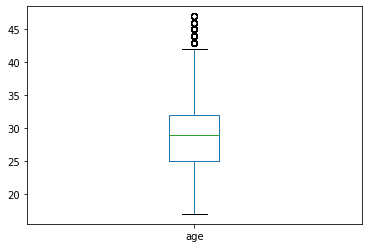

In [125]:
df_ply_revised['age'].plot(kind='box');

**Find top unique value in player age**

In [126]:
df_ply_revised['age'].value_counts().iloc[0:5]

28    15048
29    14309
27    13627
26    13095
25    13051
Name: age, dtype: int64

In [127]:
df_ply_revised.describe()

,id_x,player_api_id,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
count,183739.000000,183739.000000,183739.000000,183739.000000,183739.000000,182989.00000,182989.000000,182989.000000,182989.000000,182989.000000,...,182989.000000,182989.000000,182989.000000,181129.000000,182989.000000,182989.000000,182989.000000,182989.000000,182989.000000,183739.000000
mean,5519.223807,135972.658712,165665.851539,181.874791,76.553405,68.59738,73.457388,55.083896,49.914793,57.275104,...,55.001798,46.789233,50.368410,48.017082,14.697769,16.057151,20.994005,16.125729,16.434190,28.974437
std,3191.063931,136983.381441,53846.041289,6.395784,6.845951,7.04122,6.591686,17.236546,19.035179,16.484867,...,15.542651,21.225799,21.481116,21.598178,16.854111,15.854772,21.446463,16.087673,17.187638,4.852286
min,1.000000,2625.000000,2.000000,157.480000,53.071200,33.00000,39.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
25%,2754.000000,34763.000000,155787.000000,177.800000,72.122400,64.00000,69.000000,45.000000,34.000000,49.000000,...,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000,25.000000
50%,5530.000000,77767.000000,183480.000000,182.880000,76.204800,69.00000,74.000000,59.000000,53.000000,60.000000,...,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000,29.000000
75%,8254.000000,191081.000000,199850.000000,185.420000,81.194400,73.00000,78.000000,68.000000,65.000000,68.000000,...,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000,32.000000
max,11075.000000,750584.000000,234141.000000,208.280000,110.224800,94.00000,97.000000,95.000000,97.000000,98.000000,...,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000,47.000000


count    183739.000000
mean         28.974437
std           4.852286
min          17.000000
25%          25.000000
50%          29.000000
75%          32.000000
max          47.000000
Name: age, dtype: float64


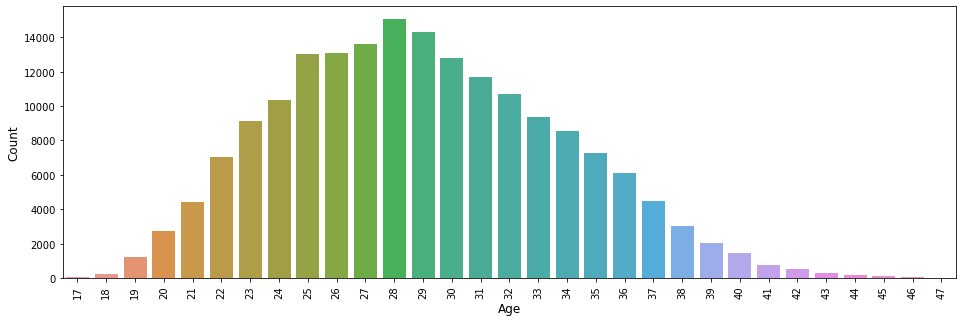

In [128]:
plt.figure(figsize=(16,5))
sns.countplot(x=df_ply_revised['age'], data=df_ply_revised)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
print(df_ply_revised.age.describe())
plt.show()

* Average player age was 28.95 years old.
* Minimum age was 17 years old.
* Maximum age was 46 years old.

count    183739.000000
mean         76.553405
std           6.845951
min          53.071200
25%          72.122400
50%          76.204800
75%          81.194400
max         110.224800
Name: weight, dtype: float64


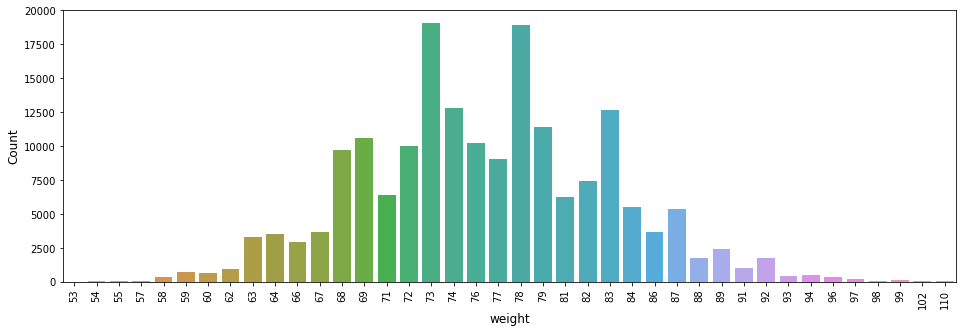

In [129]:
plt.figure(figsize=(16,5))
sns.countplot(x=df_ply_revised['weight'].astype(int), data=df_ply_revised)
plt.ylabel('Count', fontsize=12)
plt.xlabel('weight', fontsize=12)
plt.xticks(rotation='vertical')
print(df_ply_revised.weight.describe())
plt.show()

count    183739.000000
mean        181.874791
std           6.395784
min         157.480000
25%         177.800000
50%         182.880000
75%         185.420000
max         208.280000
Name: height, dtype: float64


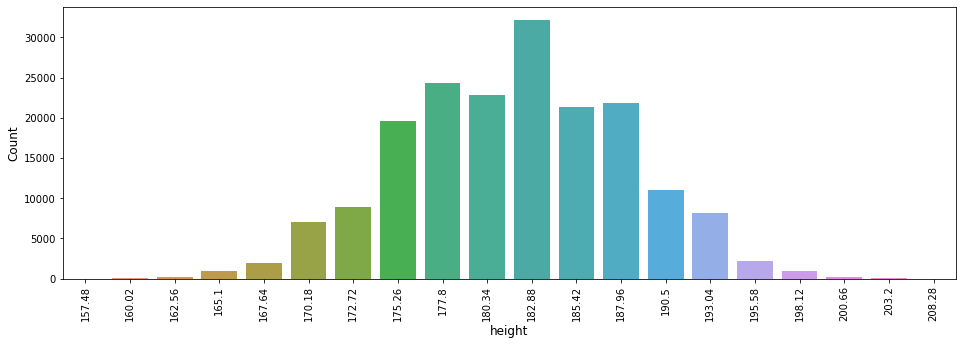

In [130]:
plt.figure(figsize=(16,5))
sns.countplot(x=df_ply_revised['height'], data=df_ply_revised)
plt.ylabel('Count', fontsize=12)
plt.xlabel('height', fontsize=12)
plt.xticks(rotation='vertical')
print(df_ply_revised.height.describe())
plt.show()

count    182989.00000
mean         68.59738
std           7.04122
min          33.00000
25%          64.00000
50%          69.00000
75%          73.00000
max          94.00000
Name: overall_rating, dtype: float64


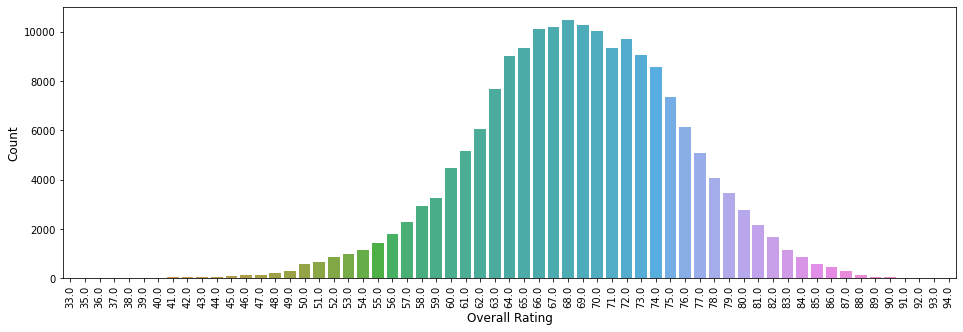

In [131]:
plt.figure(figsize=(16,5))
sns.countplot(x=df_ply_revised['overall_rating'], data=df_ply_revised)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Overall Rating', fontsize=12)
plt.xticks(rotation='vertical')
print(df_ply_revised.overall_rating.describe())
plt.show()

In [132]:
# Top Players in Overall rating during Match attrbiute:
print(df_players.groupby('player_name').agg({'overall_rating':'mean'}).sort_values(by='overall_rating',ascending=False).head())
print(df_players.groupby('player_name').agg({'overall_rating':'mean'}).sort_values(by='overall_rating',ascending=False).tail())

                    overall_rating
player_name                       
Lionel Messi             92.192308
Cristiano Ronaldo        91.280000
Franck Ribery            88.458333
Andres Iniesta           88.320000
Zlatan Ibrahimovic       88.285714
                    overall_rating
player_name                       
Jordan Kirkpatrick           45.50
Boubacar Mansaly             45.20
Badis Lebbihi                45.00
Gianluca D'Angelo            43.75
Frederic Schaub              43.00


* **[Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi)**, takes first place with score **92.192**, followed by **[Cristiano Ronaldo](https://en.wikipedia.org/wiki/Cristiano_Ronaldo)** with score **91.28**, last position occopied by [Frederic Schaub](https://en.wikipedia.org/wiki/Fr%C3%A9d%C3%A9ric_Schaub) with score **43**

In [133]:
# Top Players in potential during Match attrbiute:
df_players.groupby('player_name').agg({'potential':'mean'}).sort_values(by='potential',ascending=False).head()

,potential
player_name,
Lionel Messi,95.230769
Cristiano Ronaldo,93.480000
Fabio Cannavaro,90.833333
Neymar,90.760000
Andres Iniesta,90.560000


* **[Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi)**, takes first place with score **95.23**, followed by **[Cristiano Ronaldo](https://en.wikipedia.org/wiki/Cristiano_Ronaldo)** with score **93.48**

In [134]:
# Top Players in finishing during Match attrbiute:
df_players.groupby('player_name').agg({'finishing':'mean'}).sort_values(by='finishing',ascending=False).head()

,finishing
player_name,
Lionel Messi,92.230769
Cristiano Ronaldo,91.120000
Filippo Inzaghi,91.111111
Ruud van Nistelrooy,90.800000
Zlatan Ibrahimovic,90.000000


* **[Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi)**, takes first place with score **92.23**, followed by **[Cristiano Ronaldo](https://en.wikipedia.org/wiki/Cristiano_Ronaldo)** with score **91.12**

In [135]:
# Top Players in ball_control during Match attrbiute:
df_players.groupby('player_name').agg({'ball_control':'mean'}).sort_values(by='ball_control',ascending=False).head()

,ball_control
player_name,
Lionel Messi,95.769231
Cristiano Ronaldo,93.960000
Xavi Hernandez,93.363636
Ronaldinho,93.000000
Andres Iniesta,92.960000


* **[Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi)**, takes first place with score **95.77**, followed by **[Cristiano Ronaldo](https://en.wikipedia.org/wiki/Cristiano_Ronaldo)** with score **93.96**

* Seperate matches table by season

In [136]:
df_07_08 = pd.DataFrame(df_matches[(df_matches["season"]=="2007/2008")])
df_08_09 = pd.DataFrame(df_matches[(df_matches["season"]=="2008/2009")])
df_09_10 = pd.DataFrame(df_matches[(df_matches["season"]=="2009/2010")])
df_10_11 = pd.DataFrame(df_matches[(df_matches["season"]=="2010/2011")])
df_11_12 = pd.DataFrame(df_matches[(df_matches["season"]=="2011/2012")])
df_12_13 = pd.DataFrame(df_matches[(df_matches["season"]=="2012/2013")])
df_13_14 = pd.DataFrame(df_matches[(df_matches["season"]=="2013/2014")])
df_14_15 = pd.DataFrame(df_matches[(df_matches["season"]=="2014/2015")])
df_15_16 = pd.DataFrame(df_matches[(df_matches["season"]=="2015/2016")])

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
Spain LIGA BBVA                    631             470        1101
Italy Serie A                      578             410         988
England Premier League             532             410         942
Germany 1. Bundesliga              520             374         894
Netherlands Eredivisie             524             346         870

Match Result for season 2008/2009

Matches win by home team    : 1566 about 47.08%
Matches win by away team    : 929 about 27.93%
Matches win by draw         : 831 about 24.98%


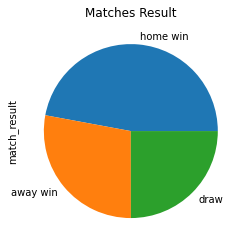

In [137]:
total_matche=df_08_09.match_result.shape[0]
home_win=len(df_08_09.query('match_result == \'home win\''))
away_win=len(df_08_09.query('match_result == \'away win\''))
draw=len(df_08_09.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_08_09.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2008/2009')
df_08_09['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
England Premier League             645             408        1053
Spain LIGA BBVA                    608             423        1031
Italy Serie A                      586             406         992
France Ligue 1                     528             388         916
Netherlands Eredivisie             528             364         892

Match Result for season 2009/2010

Matches win by home team    : 1532 about 47.43%
Matches win by away team    : 884 about 27.37%
Matches win by draw         : 814 about 25.20%


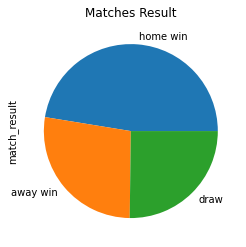

In [138]:
total_matche=df_09_10.match_result.shape[0]
home_win=len(df_09_10.query('match_result == \'home win\''))
away_win=len(df_09_10.query('match_result == \'away win\''))
draw=len(df_09_10.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_09_10.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2009/2010')
df_09_10['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
England Premier League             617             446        1063
Spain LIGA BBVA                    622             420        1042
Netherlands Eredivisie             595             392         987
Italy Serie A                      544             411         955
Germany 1. Bundesliga              504             390         894

Match Result for season 2010/2011

Matches win by home team    : 1520 about 46.63%
Matches win by away team    : 901 about 27.64%
Matches win by draw         : 839 about 25.74%


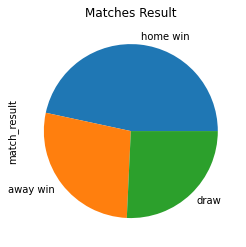

In [139]:
total_matche=df_10_11.match_result.shape[0]
home_win=len(df_10_11.query('match_result == \'home win\''))
away_win=len(df_10_11.query('match_result == \'away win\''))
draw=len(df_10_11.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_10_11.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2010/2011')
df_10_11['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
England Premier League             604             462        1066
Spain LIGA BBVA                    638             412        1050
Netherlands Eredivisie             585             412         997
France Ligue 1                     560             396         956
Italy Serie A                      541             384         925

Match Result for season 2011/2012

Matches win by home team    : 1498 about 46.52%
Matches win by away team    : 904 about 28.07%
Matches win by draw         : 818 about 25.40%


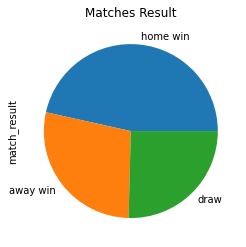

In [140]:
total_matche=df_11_12.match_result.shape[0]
home_win=len(df_11_12.query('match_result == \'home win\''))
away_win=len(df_11_12.query('match_result == \'away win\''))
draw=len(df_11_12.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_11_12.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2011/2012')
df_11_12['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
Spain LIGA BBVA                    641             450        1091
England Premier League             592             471        1063
Italy Serie A                      568             435        1003
France Ligue 1                     558             409         967
Netherlands Eredivisie             540             424         964

Match Result for Season 2012/2013

Matches win by home team    : 1444 about 44.29%
Matches win by away team    : 963 about 29.54%
Matches win by draw         : 853 about 26.17%


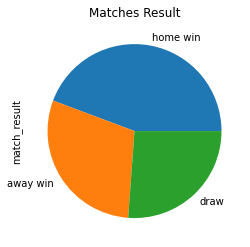

In [141]:
total_matche=df_12_13.match_result.shape[0]
home_win=len(df_12_13.query('match_result == \'home win\''))
away_win=len(df_12_13.query('match_result == \'away win\''))
draw=len(df_12_13.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_12_13.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for Season 2012/2013')
df_12_13['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
England Premier League             598             454        1052
Spain LIGA BBVA                    620             425        1045
Italy Serie A                      584             451        1035
Netherlands Eredivisie             568             410         978
Germany 1. Bundesliga              535             432         967

Match Result for season 2013/2014

Matches win by home team    : 1404 about 46.31%
Matches win by away team    : 892 about 29.42%
Matches win by draw         : 736 about 24.27%


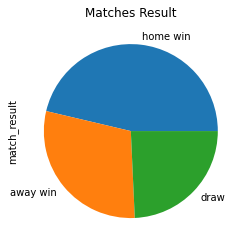

In [142]:
total_matche=df_13_14.match_result.shape[0]
home_win=len(df_13_14.query('match_result == \'home win\''))
away_win=len(df_13_14.query('match_result == \'away win\''))
draw=len(df_13_14.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_13_14.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2013/2014')
df_13_14['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
Italy Serie A                      568             450        1018
Spain LIGA BBVA                    584             425        1009
England Premier League             560             415         975
France Ligue 1                     536             411         947
Netherlands Eredivisie             518             424         942

Match Result for season 2014/2015

Matches win by home team    : 1494 about 44.93%
Matches win by away team    : 981 about 29.50%
Matches win by draw         : 850 about 25.56%


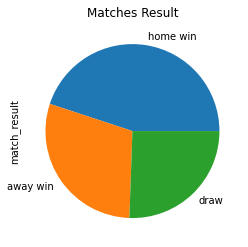

In [143]:
total_matche=df_14_15.match_result.shape[0]
home_win=len(df_14_15.query('match_result == \'home win\''))
away_win=len(df_14_15.query('match_result == \'away win\''))
draw=len(df_14_15.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_14_15.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2014/2015')
df_14_15['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
Spain LIGA BBVA                    615             428        1043
England Premier League             567             459        1026
Italy Serie A                      559             420         979
France Ligue 1                     546             414         960
Netherlands Eredivisie             499             413         912

Match Result for season 2015/2016

Matches win by home team    : 1459 about 43.87%
Matches win by away team    : 1012 about 30.43%
Matches win by draw         : 855 about 25.71%


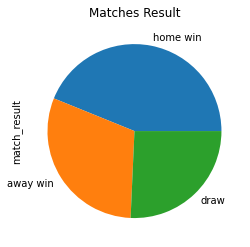

In [144]:
total_matche=df_15_16.match_result.shape[0]
home_win=len(df_15_16.query('match_result == \'home win\''))
away_win=len(df_15_16.query('match_result == \'away win\''))
draw=len(df_15_16.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_15_16.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result for season 2015/2016')
df_15_16['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

**Seprate every country league in differnt table**

In [145]:
df_belgium = pd.DataFrame(df_matches[(df_matches["league_name"]=="Belgium Jupiler League")])
df_england = pd.DataFrame(df_matches[(df_matches["league_name"]=="England Premier League")])
df_france = pd.DataFrame(df_matches[(df_matches["league_name"]=="France Ligue 1")])
df_germany = pd.DataFrame(df_matches[(df_matches["league_name"]=="Germany 1. Bundesliga")])
df_italy = pd.DataFrame(df_matches[(df_matches["league_name"]=="Italy Serie A")])
df_netherlands = pd.DataFrame(df_matches[(df_matches["league_name"]=="Netherlands Eredivisie")])
df_poland = pd.DataFrame(df_matches[(df_matches["league_name"]=="Poland Ekstraklasa")])
df_portugal = pd.DataFrame(df_matches[(df_matches["league_name"]=="Portugal Liga ZON Sagres")])
df_scotland = pd.DataFrame(df_matches[(df_matches["league_name"]=="Scotland Premier League")])
df_spain = pd.DataFrame(df_matches[(df_matches["league_name"]=="Spain LIGA BBVA")])
df_switzerland = pd.DataFrame(df_matches[(df_matches["league_name"]=="Switzerland Super League")])

In [146]:
print(df_belgium.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2008/2009             499             356         855
2012/2013             375             328         703
2015/2016             402             292         694
2011/2012             421             270         691
2014/2015             376             292         668
2010/2011             382             253         635
2009/2010             308             257         565
2013/2014              18              12          30


**For Belgium Jupiler League**
* Season **2008/2009** had the most goal count with **total goal = 855** then seasons of **2012/2013** & **2012/2013** with **703 goals**.
* For season **2013/2014** alot of missing data it is not logic that we had only **30 goals** during this season

In [147]:
print(df_england.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2011/2012             604             462        1066
2010/2011             617             446        1063
2012/2013             592             471        1063
2009/2010             645             408        1053
2013/2014             598             454        1052
2015/2016             567             459        1026
2014/2015             560             415         975
2008/2009             532             410         942


**For England Premier League**
* Season **2011/2012** had the most goal count with **total goal = 1066** then seasons of **2010/2011** & **2012/2013** with **1063 goals**.

In [148]:
print(df_france.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2012/2013             558             409         967
2015/2016             546             414         960
2011/2012             560             396         956
2014/2015             536             411         947
2013/2014             538             395         933
2009/2010             528             388         916
2010/2011             510             380         890
2008/2009             489             369         858


**For France Ligue 1**
* Season **2012/2013** had the most goal count with **total goal = 967 goals** then season of **2015/2016** with **960 goals**.

In [149]:
print(df_germany.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2013/2014             535             432         967
2012/2013             487             411         898
2008/2009             520             374         894
2010/2011             504             390         894
2011/2012             508             367         875
2009/2010             463             403         866
2015/2016             479             387         866
2014/2015             486             357         843


**For Germany 1. Bundesliga**
* Season **2013/2014** had the most goal count with **total goal = 967 goals** then season of **2012/2013** with **898 goals**.

In [150]:
print(df_italy.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2013/2014             584             451        1035
2014/2015             568             450        1018
2012/2013             568             435        1003
2009/2010             586             406         992
2008/2009             578             410         988
2015/2016             559             420         979
2010/2011             544             411         955
2011/2012             541             384         925


**For Italy Serie A**
* Season **2013/2014** had the most goal count with **total goal = 1035 goals** then season of **2014/2015** with **1018 goals**.

In [151]:
print(df_netherlands.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2011/2012             585             412         997
2010/2011             595             392         987
2013/2014             568             410         978
2012/2013             540             424         964
2014/2015             518             424         942
2015/2016             499             413         912
2009/2010             528             364         892
2008/2009             524             346         870


**For Netherlands Eredivisie**
* Season **2011/2012** had the most goal count with **total goal = 997 goals** then season of **2010/2011** with **987 goals**.

In [152]:
print(df_poland.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))
print('====================================================================')

           home_team_goal  away_team_goal  total_goal
season                                               
2015/2016             341             294         635
2013/2014             372             262         634
2014/2015             364             264         628
2012/2013             322             276         598
2010/2011             361             217         578
2009/2010             299             233         532
2011/2012             298             229         527
2008/2009             321             203         524


**For Poland Ekstraklasa**
* Season **2015/2016** had the most goal count with **total goal = 635 goals** then season of **2013/2014** with **634 goals**.

In [153]:
df_portugal.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False)

,home_team_goal,away_team_goal,total_goal
season,,,
2015/2016,463,368,831
2014/2015,444,319,763
2012/2013,361,306,667
2011/2012,359,275,634
2009/2010,333,268,601
2010/2011,315,269,584
2013/2014,319,250,569
2008/2009,296,256,552


**For Portugal Liga ZON Sagres**
* Season **2015/2016** had the most goal count with **total goal = 831 goals** then season of **2014/2015** with **763 goals**.

In [154]:
df_scotland.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False)

,home_team_goal,away_team_goal,total_goal
season,,,
2015/2016,343,307,650
2013/2014,345,281,626
2012/2013,337,286,623
2011/2012,315,286,601
2014/2015,330,257,587
2009/2010,321,264,585
2010/2011,315,269,584
2008/2009,301,247,548


**For Scotland Premier League**
* Season **2015/2016** had the most goal count with **total goal = 650 goals** then season of **2013/2014** with **626 goals**.

In [155]:
df_spain.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False)

,home_team_goal,away_team_goal,total_goal
season,,,
2008/2009,631,470,1101
2012/2013,641,450,1091
2011/2012,638,412,1050
2013/2014,620,425,1045
2015/2016,615,428,1043
2010/2011,622,420,1042
2009/2010,608,423,1031
2014/2015,584,425,1009


**For Spain LIGA BBVA**
* Season **2008/2009** had the most goal count with **total goal = 1101 goals** then season of **2012/2013** with **1091 goals**.

In [156]:
df_switzerland.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False)

,home_team_goal,away_team_goal,total_goal
season,,,
2009/2010,359,240,599
2015/2016,321,245,566
2008/2009,316,224,540
2010/2011,283,254,537
2013/2014,290,230,520
2014/2015,289,228,517
2012/2013,272,190,462
2011/2012,235,190,425


**For Switzerland Super League**
* Season **2009/2010** had the most goal count with **total goal = 599 goals** then season of **2015/2016** with **566 goals**.

In [157]:
df_matches.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False)

,home_team_goal,away_team_goal,total_goal
league_name,,,
Spain LIGA BBVA,4959,3453,8412
England Premier League,4715,3525,8240
Italy Serie A,4528,3367,7895
Netherlands Eredivisie,4357,3185,7542
France Ligue 1,4265,3162,7427
Germany 1. Bundesliga,3982,3121,7103
Portugal Liga ZON Sagres,2890,2311,5201
Belgium Jupiler League,2781,2060,4841
Scotland Premier League,2607,2197,4804


* **Spain Liga BBVA** had the most goal **(total goal = 8412)** in period from 2008 until 2016 then **England Premier League** **(totla goal = 8240)**.
* it seemes that most goal gain with home eam rather than away.

                        home_team_goal  away_team_goal  total_goal
league_name                                                       
Spain LIGA BBVA                   4959            3453        8412
England Premier League            4715            3525        8240
Italy Serie A                     4528            3367        7895
Netherlands Eredivisie            4357            3185        7542
France Ligue 1                    4265            3162        7427

Match Result from season 2008/2009 till 2015/2016

Matches win by home team    : 11917 about 45.87%
Matches win by away team    : 7466 about 28.74%
Matches win by draw         : 6596 about 25.39%


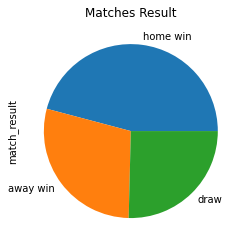

In [158]:
total_matche=df_matches.match_result.shape[0]
home_win=len(df_matches.query('match_result == \'home win\''))
away_win=len(df_matches.query('match_result == \'away win\''))
draw=len(df_matches.query('match_result == \'draw\''))
home_ratio = format((home_win/total_matche*100), '.2f')
away_ratio= format((away_win/total_matche*100), '.2f')
draw_ratio= format((draw/total_matche*100), '.2f')
print(df_matches.groupby('league_name').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False).iloc[:5])
print('====================================================================')
print()
print('Match Result from season 2008/2009 till 2015/2016')
df_matches['match_result'].value_counts().plot(kind='pie')
plt.title("Matches Result")
print()
print('Matches win by home team    : {} about {}%'.format(home_win,home_ratio))
print('Matches win by away team    : {} about {}%'.format(away_win,away_ratio))
print('Matches win by draw         : {} about {}%'.format(draw,draw_ratio))

In [159]:
print('Match Top season by Total Goals from season 2008/2009 till 2015/2016')
print('====================================================================')
print()
print(df_matches.groupby('season').agg({'home_team_goal':'sum', 'away_team_goal':'sum', 'total_goal':'sum'}).sort_values(by='total_goal',ascending=False))

Match Top season by Total Goals from season 2008/2009 till 2015/2016

           home_team_goal  away_team_goal  total_goal
season                                               
2015/2016            5135            4027        9162
2012/2013            5053            3986        9039
2014/2015            5055            3842        8897
2010/2011            5048            3701        8749
2011/2012            5064            3683        8747
2008/2009            5007            3665        8672
2009/2010            4978            3654        8632
2013/2014            4787            3602        8389


## 5. Final Conclusions

> - After loading the dataset, wrangling, cleaning, and starting visualization we reach to final conclusion for this data from our opinion may conclusion be different from one to another depending on the method of investigation but I'm sure we will meet at some points.
> - To get our investigation we create a new column with the name of match_result & total_goal, also we create column for player age.
> 
> - Finally, let us go to a final conclusion:

### 5.1. Limitations of Data

1. This data even it was big data contains because it had multi tables for for matches played from season 200/2009 till season 2015/2016 in 11 European Soccer League, with players name for all teams.
2. We have incomplete data because there is no column indicating date of retried for player, or every season team squade.
3. Missing data in Belgium Jupiler League for season 2013/2014 which contains 30 goals only.



   [back to top](#Table-of-Contents)

### 5.2. Conclusions about data

1. **Player:**

>    1.1. **Age**
    > - Average age for players was 28.96 yras old when 25% of player below 25 years old and 25% above 32 years old.
    > - We had player with age above 42 years old (common retriel for Goal Keeper) can't be droped because some of them played till season 2013.
    
>    1.2. **Weight**
    > - Average weight for players was 76.55 Kg when 25% was under 72.12 Kg and another 25% were above 81.19 Kg.
    > - We had a max. weight with 110.22 Kg this was heavy to soccer player, min. weight was 53.07 Kg.
    
>    1.3. **Hight**
    > - Average hight for players 1.81 meter when 25% was under 1.77 meter and another 25% above 1.85 meter.
    > - We had max. hight 2.08 meter which seames to be basketball player not soccer player, min. hight was 1.57 meter.

>    1.4. **Overall Potintial**
    > - Averag in Overall Potiential for players was 68.6 which is slightly low this because 25% of players had potential less than 64.0 with min. value 33 (it was very low), also 25 % of players had potential over 73 with max. value 94.
    > - For all season we found that **[Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi)**, takes first place with score **92.192**, followed by **[Cristiano Ronaldo](https://en.wikipedia.org/wiki/Cristiano_Ronaldo)** with score **91.28**, last position occopied by [Frederic Schaub](https://en.wikipedia.org/wiki/Fr%C3%A9d%C3%A9ric_Schaub) with score **43**.
    
2. **League:**
    > - According to number of goals during season which indicate a strong attcker we found that:
        * Spain LIGA BBVA occupy frist place in top 5 league on only 3 season and second place in 5 season.
        * England Premier League occoupy frist place in top 5 league on only 4 season, second place in 2 season and theird place in 2 season.
        * Italy Seria A occoupy frist place onle one time in season 2014/2015, second place also one time in season 2008/2009.
        * Spain LIGA BBVA occupy frist place in total goal overall seasos start from 2008/2009 till 2015/2016 then England Premier League in second place & Italy Seria A in third place.
        
3. **Season:**
    > - conclusion based on sum for goals overall the 11 Euroupen League and all seasons.
    > - We found that season 2015/2016 was take frist place in total goals number with **9162 goals**, then season 2012/2013 with **9032 goals**.
    > - Season 2013/2014 with less one in total goals with **8389 goals**.
    
4. **Match Result:**
    > - We found that from analysis of data in our hand, that we predicate that home team can win match by probability more than 45% and lost match by probability less than 29%.


   [back to top](#Table-of-Contents)